## Installing dependencies

In [1]:
!pip install gymnasium[atari]
!pip install autorom[accept-rom-license]
!pip install ray[rllib]==2.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=b9ea7ab3f4b20f8ca43d68ff0256ec367cb459f9f2b28ed9056733de8144a9f0
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

## DQN

In [3]:
import ray.rllib.algorithms.dqn as dqn
import ray
from ray import tune


env_name = "Breakout-v4"

config = dqn.DQNConfig()

config["gamma"] = 0.99
# config["gamma"] = tune.grid_search([0.9, 0.99])
config["train_batch_size"] = 64
config["timesteps_per_iteration"] = 1000
config["target_network_update_freq"] = 600
config["num_gpus"] = 1
config["model"]["fcnet_hiddens"] = [128, 128, 128]
config["model"]["fcnet_activation"] = "relu"
config["env"] = "BreakoutDeterministic-v4"
config["framework"] = "torch"
config["double_q"] = True
config["n_step"] = 3
config["exploration_fraction"] = 0.1
config["exploration_final_eps"] = 0.02
config["lr"] = 0.0005
# Initialize ray
# ray.init()

# Run training

if __name__ == '__main__':

    ray.tune.run("DQN", name="Breakout_Model", stop={"timesteps_total": 100000}, checkpoint_freq=200, config=config,
                         local_dir = "/content/ray_results1221/" + env_name,
                        )



+--------------------------------------------------------+
| Configuration for experiment     Breakout_Model        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 1                     |
+--------------------------------------------------------+

View detailed results here: /content/ray_results1221/Breakout-v4/Breakout_Model
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-11_02-13-49_335542_304/artifacts/2024-05-11_02-14-42/Breakout_Model/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-11 02:14:42. Total running time: 0s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------+
| Trial name                                 status   |
+---------------------------------------------------

(pid=1213) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=1213)   if (distutils.version.LooseVersion(tf.__version__) <
(DQN pid=1213) 2024-05-11 02:14:49,260	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
(DQN pid=1213) A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
(DQN pid=1213) [Powered by Stella]
(DQN pid=1213) /usr/local/lib/python3.10/dist-packages/ray/rllib/models/catalog.py:895: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
(DQN pid=1213)   prep = cls(observation_space, options)



Trial DQN_BreakoutDeterministic-v4_3a840_00000 started with configuration:
+--------------------------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_3a840_00000 config                          |
+--------------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                     |
| _disable_action_flattening                                               False |
| _disable_execution_plan_api                                                 -1 |
| _disable_initialize_loss_from_dummy_batch                                False |
| _disable_preprocessor_api                                                False |
| _enable_new_api_stack                                                    False |
| _enable_rl_module_api                                                       -1 |
| _env_to_module_connector                                                       |
| _evaluati

(DQN pid=1213) /usr/local/lib/python3.10/dist-packages/ray/rllib/connectors/agent/obs_preproc.py:37: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
(DQN pid=1213)   self._preprocessor = get_preprocessor(obs_space)(
(DQN pid=1213) Install gputil for GPU system monitoring.
(DQN pid=1213) 2024-05-11 02:14:54,400	WARNING deprecation.py:50 -- DeprecationWarning: `num_envs_per_worker` has been deprecated. Use `AlgorithmConfig.num_envs_per_env_runner` instead. This will raise an error in the future!
(DQN pid=1213) 2024-05-11 02:14:54,438	WARNING replay_buffer.py:60 -- Estimated max memory usage for replay buffer is 8.4699 GB (50000.0 batches of size 1, 169398 bytes each), available system memory is 13.60945152 GB
(DQN pid=1213) 2024-05-11 02:14:54,438	WARNING multi_agent_prioritized_replay_buffer.py:215 -- Adding batches with column `weights` to this buffer while providing weights as a call argument to the add metho


Trial DQN_BreakoutDeterministic-v4_3a840_00000 finished iteration 1 at 2024-05-11 02:15:00. Total running time: 17s
+--------------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_3a840_00000 result              |
+--------------------------------------------------------------------+
| env_runner_results/episode_len_mean                        156.333 |
| env_runner_results/episode_return_mean                    0.833333 |
| num_env_steps_sampled_lifetime                                1002 |
+--------------------------------------------------------------------+

Trial status: 1 RUNNING
Current time: 2024-05-11 02:15:12. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                     

2024-05-11 02:15:15,659	WARNING tune.py:219 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2024-05-11 02:15:15,667	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-11 02:15:15,679	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/content/ray_results1221/Breakout-v4/Breakout_Model' in 0.0183

Trial status: 1 RUNNING
Current time: 2024-05-11 02:15:15. Total running time: 33s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                 status       iter     total time (s)     ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_BreakoutDeterministic-v4_3a840_00000   RUNNING         1             6.2126   1002   0.833333                      2                      0              156.333                      6 |
+-----------------------------------------------------------------------

2024-05-11 02:15:25,697	WARNING tune.py:1054 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: tune.run(..., resume=True)


### DQN plot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


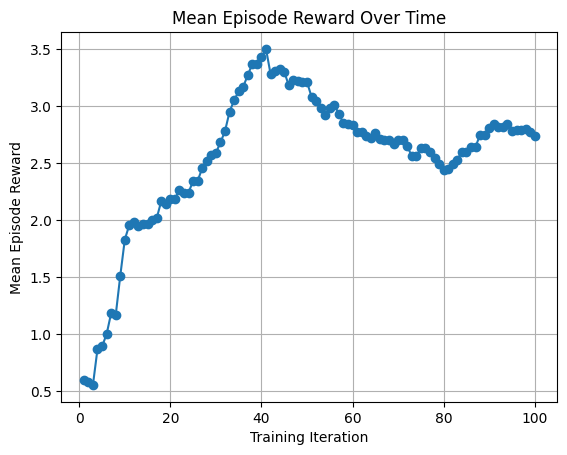

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_normal = pd.read_csv("/content/ray_results1221/Breakout-v4/Breakout_Model/DQN_BreakoutDeterministic-v4_40e6a_00000_0_2024-05-11_00-48-59/progress.csv")

# Plot
plt.plot(df_normal['training_iteration'], df_normal['episode_reward_mean'], marker='o')
plt.title('Mean Episode Reward Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Mean Episode Reward')
plt.grid(True)
plt.show()

## Double DQN

In [4]:
import ray.rllib.algorithms.dqn as dqn
import ray
from ray import tune


env_name = "Breakout-v4"

config = dqn.DQNConfig()

config["gamma"] = 0.95  # Lowering the discount factor can make the agent more short-sighted and potentially learn faster.
config["train_batch_size"] = 32  # Increasing the batch size can improve the stability of the learning process.
config["timesteps_per_iteration"] = 2000  # More timesteps per iteration can provide more diverse experiences for each update.
config["target_network_update_freq"] = 800  # A less frequent update of the target network can stabilize the learning process.
config["model"]["fcnet_hiddens"] = [256, 256,256]  # A larger network might be able to learn more complex representations.
config["double_q"] = False  # Enabling Double Q-Learning can help mitigate the overestimation bias of Q-Learning.
config["n_step"] = 5  # A larger n-step return might make the learning process more stable and efficient.
config["exploration_fraction"] = 0.2  # A higher exploration fraction can encourage the agent to explore more at the beginning of training.
config["exploration_final_eps"] = 0.01  # A lower final epsilon value can make the policy less random as training progresses.
config["lr"] = 0.001  # A higher learning rate can make the agent learn faster, but it might also destabilize the learning process.
config["num_gpus"] = 1
config["env"] = "BreakoutDeterministic-v4"

# config["gamma"] = 0.99
# # config["gamma"] = tune.grid_search([0.9, 0.99])
# config["train_batch_size"] = 64
# config["timesteps_per_iteration"] = 1000
# config["target_network_update_freq"] = 600
# config["num_gpus"] = 1
# config["model"]["fcnet_hiddens"] = [128, 128, 128]
# config["model"]["fcnet_activation"] = "relu"
# config["env"] = "BreakoutDeterministic-v4"
# config["framework"] = "torch"
# # config["double_q"] = True
# config["n_step"] = 3
# config["exploration_fraction"] = 0.1
# config["exploration_final_eps"] = 0.02
# config["lr"] = 0.0005
# # Initialize ray
# ray.init()

# Run training

if __name__ == '__main__':

    ray.tune.run("DQN", name="Breakout_Model", stop={"timesteps_total": 100000}, checkpoint_freq=20, config=config,
                         local_dir = "/content/ray_results_model2/" + env_name,
                        )



+--------------------------------------------------------+
| Configuration for experiment     Breakout_Model        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 1                     |
+--------------------------------------------------------+

View detailed results here: /content/ray_results_model2/Breakout-v4/Breakout_Model
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-11_02-13-49_335542_304/artifacts/2024-05-11_02-16-30/Breakout_Model/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-11 02:16:30. Total running time: 0s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------+
| Trial name                                 status   |
+------------------------------------------------

(pid=1713) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=1713)   if (distutils.version.LooseVersion(tf.__version__) <
(DQN pid=1713) 2024-05-11 02:16:37,950	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
(DQN pid=1713) A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
(DQN pid=1713) [Powered by Stella]
(DQN pid=1713) /usr/local/lib/python3.10/dist-packages/ray/rllib/models/catalog.py:895: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
(DQN pid=1713)   prep = cls(observation_space, options)



Trial DQN_BreakoutDeterministic-v4_7b00e_00000 started with configuration:
+--------------------------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_7b00e_00000 config                          |
+--------------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                     |
| _disable_action_flattening                                               False |
| _disable_execution_plan_api                                                 -1 |
| _disable_initialize_loss_from_dummy_batch                                False |
| _disable_preprocessor_api                                                False |
| _enable_new_api_stack                                                    False |
| _enable_rl_module_api                                                       -1 |
| _env_to_module_connector                                                       |
| _evaluati

(DQN pid=1713) /usr/local/lib/python3.10/dist-packages/ray/rllib/connectors/agent/obs_preproc.py:37: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
(DQN pid=1713)   self._preprocessor = get_preprocessor(obs_space)(
(DQN pid=1713) Install gputil for GPU system monitoring.
(DQN pid=1713) 2024-05-11 02:16:41,979	WARNING deprecation.py:50 -- DeprecationWarning: `num_envs_per_worker` has been deprecated. Use `AlgorithmConfig.num_envs_per_env_runner` instead. This will raise an error in the future!
(DQN pid=1713) 2024-05-11 02:16:41,995	WARNING replay_buffer.py:60 -- Estimated max memory usage for replay buffer is 8.4699 GB (50000.0 batches of size 1, 169398 bytes each), available system memory is 13.60945152 GB
(DQN pid=1713) 2024-05-11 02:16:41,995	WARNING multi_agent_prioritized_replay_buffer.py:215 -- Adding batches with column `weights` to this buffer while providing weights as a call argument to the add metho


Trial DQN_BreakoutDeterministic-v4_7b00e_00000 finished iteration 1 at 2024-05-11 02:16:46. Total running time: 15s
+-----------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_7b00e_00000 result           |
+-----------------------------------------------------------------+
| env_runner_results/episode_len_mean                       190.6 |
| env_runner_results/episode_return_mean                      1.6 |
| num_env_steps_sampled_lifetime                             1000 |
+-----------------------------------------------------------------+


(DQN pid=1713) 2024-05-11 02:16:46,641	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!



Trial DQN_BreakoutDeterministic-v4_7b00e_00000 finished iteration 2 at 2024-05-11 02:16:58. Total running time: 27s
+----------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_7b00e_00000 result          |
+----------------------------------------------------------------+
| env_runner_results/episode_len_mean                        176 |
| env_runner_results/episode_return_mean                     1.1 |
| num_env_steps_sampled_lifetime                            2000 |
+----------------------------------------------------------------+

Trial status: 1 RUNNING
Current time: 2024-05-11 02:17:00. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                 status       ite

(DQN pid=1713) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/ray_results_model2/Breakout-v4/Breakout_Model/DQN_BreakoutDeterministic-v4_7b00e_00000_0_2024-05-11_02-16-30/checkpoint_000000)



Trial status: 1 RUNNING
Current time: 2024-05-11 02:20:31. Total running time: 4min 0s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                 status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_BreakoutDeterministic-v4_7b00e_00000   RUNNING        20            227.134   20000    2.02778                      7                      0              274.986                      3 |
+--------------------------------------------------------------

(DQN pid=1713) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/ray_results_model2/Breakout-v4/Breakout_Model/DQN_BreakoutDeterministic-v4_7b00e_00000_0_2024-05-11_02-16-30/checkpoint_000001)



Trial status: 1 RUNNING
Current time: 2024-05-11 02:24:31. Total running time: 8min 0s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                 status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_BreakoutDeterministic-v4_7b00e_00000   RUNNING        40            458.834   40000       2.58                     11                      0               349.68                      2 |
+--------------------------------------------------------------

(DQN pid=1713) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/ray_results_model2/Breakout-v4/Breakout_Model/DQN_BreakoutDeterministic-v4_7b00e_00000_0_2024-05-11_02-16-30/checkpoint_000002)



Trial DQN_BreakoutDeterministic-v4_7b00e_00000 finished iteration 61 at 2024-05-11 02:28:29. Total running time: 11min 58s
+------------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_7b00e_00000 result            |
+------------------------------------------------------------------+
| env_runner_results/episode_len_mean                       312.89 |
| env_runner_results/episode_return_mean                      2.13 |
| num_env_steps_sampled_lifetime                             61000 |
+------------------------------------------------------------------+

Trial status: 1 RUNNING
Current time: 2024-05-11 02:28:32. Total running time: 12min 1s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                      

(DQN pid=1713) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/ray_results_model2/Breakout-v4/Breakout_Model/DQN_BreakoutDeterministic-v4_7b00e_00000_0_2024-05-11_02-16-30/checkpoint_000003)



Trial DQN_BreakoutDeterministic-v4_7b00e_00000 finished iteration 81 at 2024-05-11 02:32:22. Total running time: 15min 51s
+------------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_7b00e_00000 result            |
+------------------------------------------------------------------+
| env_runner_results/episode_len_mean                       380.77 |
| env_runner_results/episode_return_mean                      1.69 |
| num_env_steps_sampled_lifetime                             81000 |
+------------------------------------------------------------------+

Trial status: 1 RUNNING
Current time: 2024-05-11 02:32:32. Total running time: 16min 1s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                      

2024-05-11 02:36:11,381	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-11 02:36:11,394	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/content/ray_results_model2/Breakout-v4/Breakout_Model' in 0.0341s.



Trial DQN_BreakoutDeterministic-v4_7b00e_00000 finished iteration 100 at 2024-05-11 02:36:11. Total running time: 19min 40s
+------------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_7b00e_00000 result            |
+------------------------------------------------------------------+
| env_runner_results/episode_len_mean                        218.4 |
| env_runner_results/episode_return_mean                      1.26 |
| num_env_steps_sampled_lifetime                            100000 |
+------------------------------------------------------------------+
Trial DQN_BreakoutDeterministic-v4_7b00e_00000 saved a checkpoint for iteration 100 at: (local)/content/ray_results_model2/Breakout-v4/Breakout_Model/DQN_BreakoutDeterministic-v4_7b00e_00000_0_2024-05-11_02-16-30/checkpoint_000004

Trial DQN_BreakoutDeterministic-v4_7b00e_00000 completed after 100 iterations at 2024-05-11 02:36:11. Total running time: 19min 40s

Trial status: 1 TERMINATED


(DQN pid=1713) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/ray_results_model2/Breakout-v4/Breakout_Model/DQN_BreakoutDeterministic-v4_7b00e_00000_0_2024-05-11_02-16-30/checkpoint_000004)


### Double DQN plot

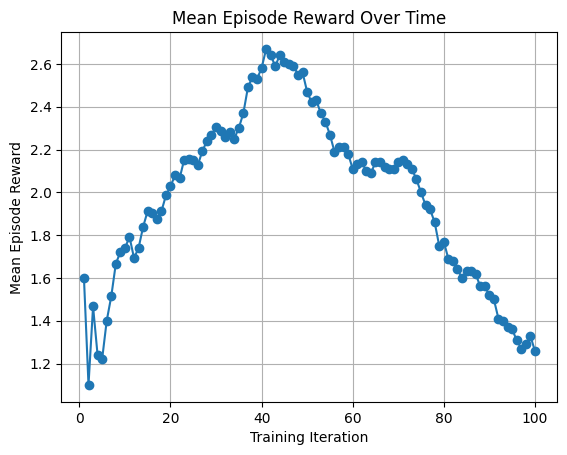

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_normal = pd.read_csv("/content/ray_results_model2/Breakout-v4/Breakout_Model/DQN_BreakoutDeterministic-v4_7b00e_00000_0_2024-05-11_02-16-30/progress.csv")
plt.plot(df_normal['training_iteration'], df_normal['episode_reward_mean'], marker='o')
plt.title('Mean Episode Reward Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Mean Episode Reward')
plt.grid(True)
plt.show()

## Imp Rough Work

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"C:\Users\rafip\Downloads\progress (3).csv")
df = pd.read_csv(r"C:\Users\rafip\Downloads\progress (2).csv")


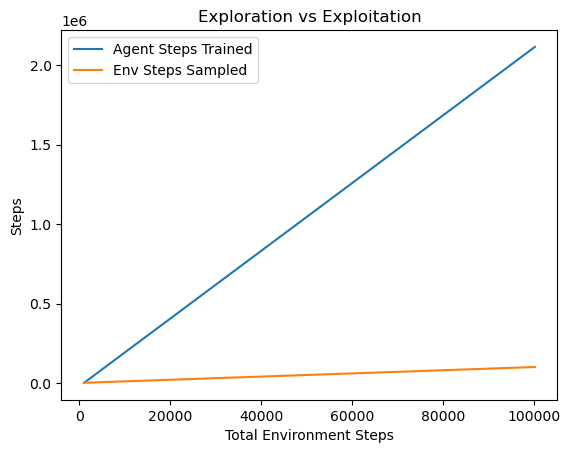

In [18]:
# plt.plot(df["timesteps_total"], df["info/num_agent_steps_sampled"], label="Agent Steps Sampled")
plt.plot(df["timesteps_total"], df["info/num_agent_steps_trained"], label="Agent Steps Trained")
plt.plot(df["timesteps_total"], df["info/num_env_steps_sampled"], label="Env Steps Sampled")
# plt.plot(df["timesteps_total"], df["info/num_env_steps_trained"], label="Env Steps Trained")
plt.xlabel("Total Environment Steps")
plt.ylabel("Steps")
plt.title("Exploration vs Exploitation")
plt.legend()
plt.show()

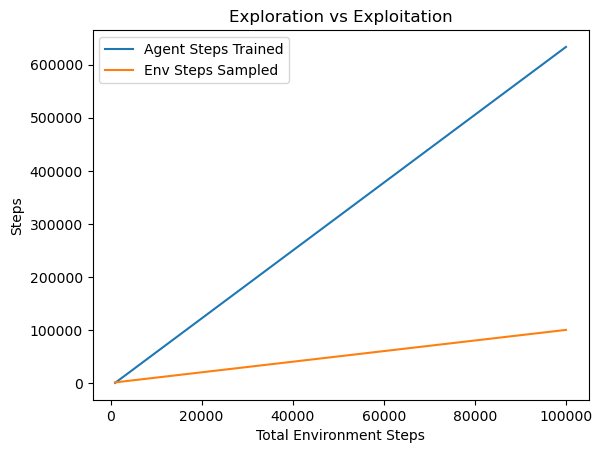

In [16]:
# plt.plot(df["timesteps_total"], df["info/num_agent_steps_sampled"], label="Agent Steps Sampled")
plt.plot(df["timesteps_total"], df["info/num_agent_steps_trained"], label="Agent Steps Trained")
plt.plot(df["timesteps_total"], df["info/num_env_steps_sampled"], label="Env Steps Sampled")
# plt.plot(df["timesteps_total"], df["info/num_env_steps_trained"], label="Env Steps Trained")
plt.xlabel("Total Environment Steps")
plt.ylabel("Steps")
plt.title("Exploration vs Exploitation")
plt.legend()
plt.show()

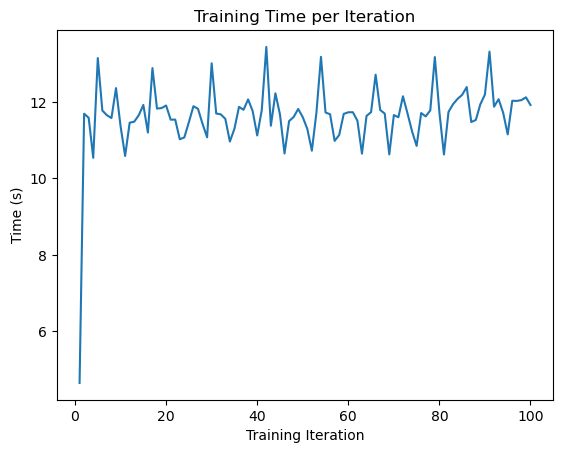

In [9]:
plt.plot(df["training_iteration"], df["time_this_iter_s"])
plt.xlabel("Training Iteration")
plt.ylabel("Time (s)")
plt.title("Training Time per Iteration")
plt.show()

In [13]:
import ray.rllib.algorithms.ppo as ppo

config_1 = ppo.PPOConfig()

In [18]:

config_ppo["env"] =  env_name,
config_ppo["gamma"] = 0.99,
config_ppo["train_batch_size"] =  64,
config_ppo["timesteps_per_iteration"] = 1000,
config_ppo["target_network_update_freq"] = 600,
config_ppo["num_gpus"]= 1,
config_ppo["model"]["fcnet_hiddens"] = [256, 256, 256],
config_ppo["model"]["fcnet_activation"] = "relu",
config_ppo["framework"] = "torch",
config_ppo["n_step"] = 3,
config_ppo["exploration_fraction"] =0.1,
config_ppo["exploration_final_eps"]= 0.02,
config_ppo["lr"] =  0.0005,


dict_keys(['extra_python_environs_for_driver', 'extra_python_environs_for_worker', 'num_gpus', 'num_cpus_per_worker', 'num_gpus_per_worker', '_fake_gpus', 'num_learner_workers', 'num_gpus_per_learner_worker', 'num_cpus_per_learner_worker', 'local_gpu_idx', 'custom_resources_per_worker', 'placement_strategy', 'eager_tracing', 'eager_max_retraces', 'tf_session_args', 'local_tf_session_args', 'torch_compile_learner', 'torch_compile_learner_what_to_compile', 'torch_compile_learner_dynamo_backend', 'torch_compile_learner_dynamo_mode', 'torch_compile_worker', 'torch_compile_worker_dynamo_backend', 'torch_compile_worker_dynamo_mode', 'env', 'env_config', 'observation_space', 'action_space', 'clip_rewards', 'normalize_actions', 'clip_actions', '_is_atari', 'env_task_fn', 'render_env', 'action_mask_key', 'env_runner_cls', 'num_envs_per_env_runner', 'validate_env_runners_after_construction', 'sample_timeout_s', '_env_to_module_connector', 'add_default_connectors_to_env_to_module_pipeline', '_mod

In [25]:
import ray
from ray import tune
# from ray.rllib.agents.ppo import PPOTrainer
import ray.rllib.algorithms.ppo as ppo

env_name = "Breakout-v4"

config_ppo = ppo.PPOConfig()


config_ppo["env"] =  env_name,
config_ppo["gamma"] = 0.99,
config_ppo["train_batch_size"] =  64,
config_ppo["timesteps_per_iteration"] = 1000,
config_ppo["target_network_update_freq"] = 600,
config_ppo["num_gpus"]= 1,
config_ppo["model"]["fcnet_hiddens"] = [128, 128, 128],
config_ppo["model"]["fcnet_activation"] = "relu",
config_ppo["framework"] = "torch",
config_ppo["n_step"] = 3,
config_ppo["exploration_fraction"] =0.1,
config_ppo["exploration_final_eps"]= 0.02,
config_ppo["lr"] =  0.0005,


# Initialize ray
# ray.init()

# Run training
if __name__ == '__main__':
    tune.run("PPO", name="Breakout_Model", stop={"timesteps_total": 100000}, checkpoint_freq=200, config=config_ppo,
             local_dir="/content/ray_resultsPPO/" + env_name)


+--------------------------------------------------------+
| Configuration for experiment     Breakout_Model        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 1                     |
+--------------------------------------------------------+

View detailed results here: /content/ray_resultsPPO/Breakout-v4/Breakout_Model
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-11_00-48-50_778532_151/artifacts/2024-05-11_02-04-52/Breakout_Model/driver_artifacts`



TypeError: '>' not supported between instances of 'tuple' and 'int'

In [ ]:
import ray.rllib.algorithms.dqn as dqn
import ray
from ray import tune
# All parameters can be found here: https://github.com/ray-project/ray/blob/master/rllib/algorithms/dqn/dqn.py

config = dqn.DQNConfig()

config["gamma"] = 0.99
# config["train_batch_size"] = 64
# config["timesteps_per_iteration"] = 2000
# config["target_network_update_freq"] = 600
# config["num_gpus"] = 1
# config["model"]["fcnet_hiddens"] = [128, 128, 128]
# config["model"]["fcnet_activation"] = "relu"
# config["env"] = "BreakoutDeterministic-v4"
# config["framework"] = "torch"

# config["gamma"] = tune.grid_search([0.9, 0.99])
config["train_batch_size"] = 64
config["timesteps_per_iteration"] = 2000
config["target_network_update_freq"] = 600
config["num_gpus"] = 1
config["model"]["fcnet_hiddens"] = [128, 128, 128]
config["model"]["fcnet_activation"] = "relu"
config["env"] = "BreakoutDeterministic-v4"
config["framework"] = "torch"
config["double_q"] = True
config["n_step"] = 3
# config["buffer_size"] = 100000
config["exploration_fraction"] = 0.1
config["exploration_final_eps"] = 0.02
config["lr"] = 0.0005
# Initialize ray
# ray.init()

# Run training
analysis = ray.tune.run("DQN", name="Breakout_Model", stop={"timesteps_total": 4000}, checkpoint_freq=20, config=config)


+--------------------------------------------------------+
| Configuration for experiment     Breakout_Model        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 1                     |
+--------------------------------------------------------+

View detailed results here: /root/ray_results/Breakout_Model
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-10_17-33-13_255507_617/artifacts/2024-05-10_18-00-02/Breakout_Model/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-10 18:00:02. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------+
| Trial name                                 status   |
+-----------------------------------------------------+
| DQN_BreakoutDeter

2024-05-10 18:00:10,081	WARNING tune.py:219 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2024-05-10 18:00:10,088	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/Breakout_Model' in 0.0037s.
2024-05-10 18:00:10,093	WARNING tune.py:1054 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: tune.run(..., resume=True)
2024-05-10 18:00:10,096	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 1 trial(s):
- DQN_BreakoutDeterministic-v4_1fac1_00000: FileNotFoundError('Could not fetch metrics for DQN_BreakoutDeterministic-v4_1fac1_00000: both result.json and progress.csv were not found at /root/ray_results/Breakout_Model/DQN_BreakoutDeterministic-v4_1fac1_00000_0_2024-05-10_18-00-02')


Trial status: 1 PENDING
Current time: 2024-05-10 18:00:10. Total running time: 7s
Logical resource usage: 0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------+
| Trial name                                 status   |
+-----------------------------------------------------+
| DQN_BreakoutDeterministic-v4_1fac1_00000   PENDING  |
+-----------------------------------------------------+



In [ ]:
from ray.tune.analysis import experiment_analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
avg_rewards = []
episodes = 3500
for episode in range(episodes):
  # Perform one iteration of training the policy with PPO
  # result = trainer.train()

  analysis = ray.tune.run("DQN", name="Breakout_Model", checkpoint_freq=20, config=config)

  print("Episode ", episode, ": ", "Score: ", analysis.results['episode_reward_mean'])
  avg_rewards.append(analysis.results['episode_reward_mean'])

  # if episode % 10 == 0 and episode > 1:
  # checkpoint = trainer.save()
  # print("checkpoint saved at", checkpoint)

/usr/local/lib/python3.10/dist-packages/ray/tune/tune.py:673: DeprecationWarning: checkpoint_freq is deprecated and will be removed. use checkpoint_config.checkpoint_frequency instead.
  warnings.warn(


+--------------------------------------------------------+
| Configuration for experiment     Breakout_Model        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 1                     |
+--------------------------------------------------------+

View detailed results here: /root/ray_results/Breakout_Model
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-10_16-23-57_685752_777/artifacts/2024-05-10_17-00-03/Breakout_Model/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-10 17:00:04. Total running time: 0s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-----------------------------------------------------+
| Trial name                                 status   |
+-----------------------------------------------------+
| DQN_BreakoutD

(pid=10598) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=10598)   if (distutils.version.LooseVersion(tf.__version__) <
(DQN pid=10598) 2024-05-10 17:00:12,698	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
(DQN pid=10598) A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
(DQN pid=10598) [Powered by Stella]
(DQN pid=10598) /usr/local/lib/python3.10/dist-packages/ray/rllib/models/catalog.py:895: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
(DQN pid=10598)   prep = cls(observation_space, options)



Trial DQN_BreakoutDeterministic-v4_becb0_00000 started with configuration:
+--------------------------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_becb0_00000 config                          |
+--------------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                     |
| _disable_action_flattening                                               False |
| _disable_execution_plan_api                                                 -1 |
| _disable_initialize_loss_from_dummy_batch                                False |
| _disable_preprocessor_api                                                False |
| _enable_new_api_stack                                                    False |
| _enable_rl_module_api                                                       -1 |
| _env_to_module_connector                                                       |
| _evaluati

(DQN pid=10598) /usr/local/lib/python3.10/dist-packages/ray/rllib/connectors/agent/obs_preproc.py:37: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
(DQN pid=10598)   self._preprocessor = get_preprocessor(obs_space)(
(DQN pid=10598) Install gputil for GPU system monitoring.
(DQN pid=10598) 2024-05-10 17:00:15,342	WARNING deprecation.py:50 -- DeprecationWarning: `num_envs_per_worker` has been deprecated. Use `AlgorithmConfig.num_envs_per_env_runner` instead. This will raise an error in the future!
(DQN pid=10598) 2024-05-10 17:00:15,360	WARNING replay_buffer.py:60 -- Estimated max memory usage for replay buffer is 8.4699 GB (50000.0 batches of size 1, 169398 bytes each), available system memory is 13.60945152 GB



Trial DQN_BreakoutDeterministic-v4_becb0_00000 finished iteration 1 at 2024-05-10 17:00:22. Total running time: 18s
+----------------------------------------------------------------+
| Trial DQN_BreakoutDeterministic-v4_becb0_00000 result          |
+----------------------------------------------------------------+
| env_runner_results/episode_len_mean                        176 |
| env_runner_results/episode_return_mean                     0.8 |
| num_env_steps_sampled_lifetime                            1000 |
+----------------------------------------------------------------+


(DQN pid=10598) 2024-05-10 17:00:22,612	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!



Trial status: 1 RUNNING
Current time: 2024-05-10 17:00:34. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                 status       iter     total time (s)     ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_BreakoutDeterministic-v4_becb0_00000   RUNNING         1            7.22103   1000        0.8                      2                      0                  176                      5 |
+----------------------------------------------------------------------

2024-05-10 17:07:31,871	WARNING tune.py:219 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2024-05-10 17:07:31,883	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-10 17:07:31,892	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/Breakout_Model' in 0.0164s.



Trial status: 1 RUNNING
Current time: 2024-05-10 17:07:31. Total running time: 7min 28s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                                 status       iter     total time (s)     ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_BreakoutDeterministic-v4_becb0_00000   RUNNING         7             430.46   7000   0.846154                      3                      0              179.231                      6 |
+-----------------------------------------------------------------

KeyboardInterrupt: 

In [ ]:
config.model.keys()

dict_keys(['_disable_preprocessor_api', '_disable_action_flattening', 'fcnet_hiddens', 'fcnet_activation', 'fcnet_weights_initializer', 'fcnet_weights_initializer_config', 'fcnet_bias_initializer', 'fcnet_bias_initializer_config', 'conv_filters', 'conv_activation', 'conv_kernel_initializer', 'conv_kernel_initializer_config', 'conv_bias_initializer', 'conv_bias_initializer_config', 'conv_transpose_kernel_initializer', 'conv_transpose_kernel_initializer_config', 'conv_transpose_bias_initializer', 'conv_transpose_bias_initializer_config', 'post_fcnet_hiddens', 'post_fcnet_activation', 'post_fcnet_weights_initializer', 'post_fcnet_weights_initializer_config', 'post_fcnet_bias_initializer', 'post_fcnet_bias_initializer_config', 'free_log_std', 'no_final_linear', 'vf_share_layers', 'use_lstm', 'max_seq_len', 'lstm_cell_size', 'lstm_use_prev_action', 'lstm_use_prev_reward', 'lstm_weights_initializer', 'lstm_weights_initializer_config', 'lstm_bias_initializer', 'lstm_bias_initializer_config', 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


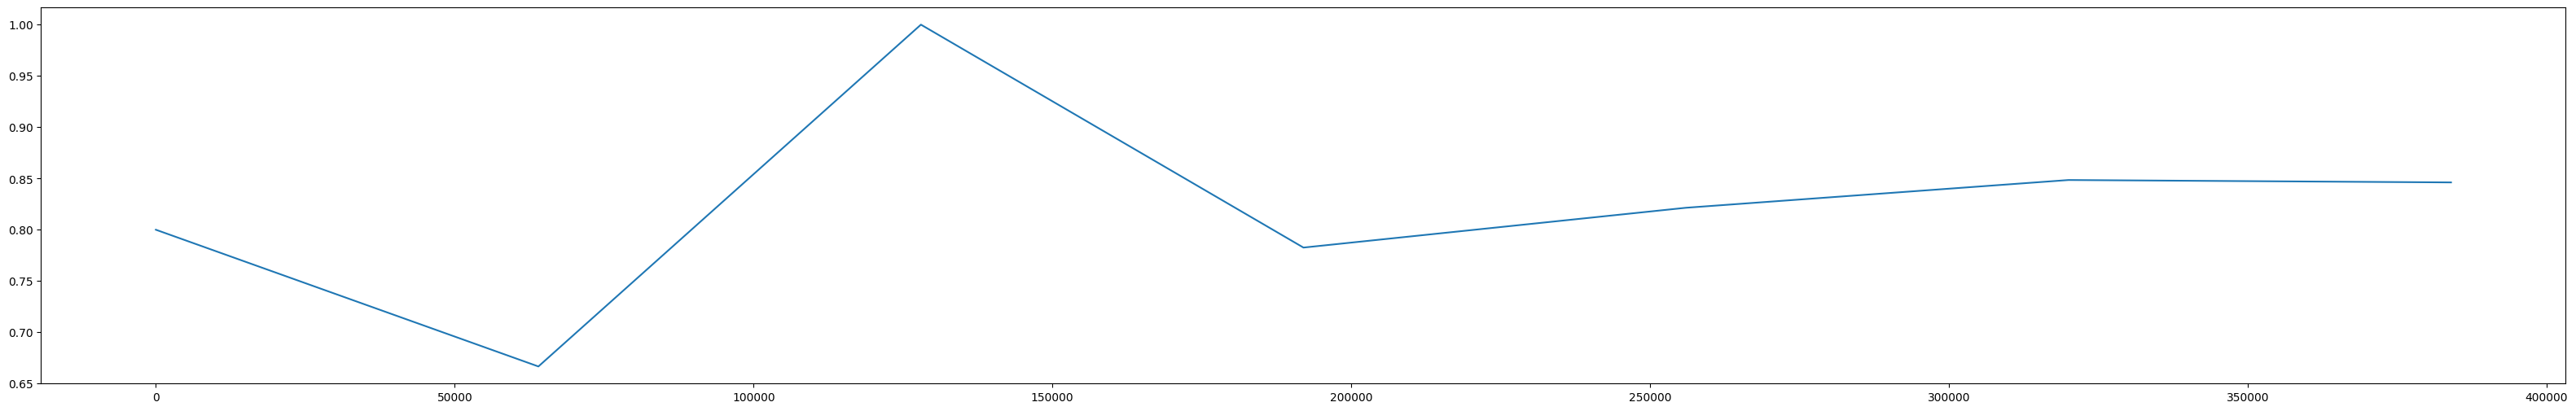

In [ ]:
import pandas as pd
df_normal = pd.read_csv("/root/ray_results/Breakout_Model/DQN_BreakoutDeterministic-v4_becb0_00000_0_2024-05-10_17-00-03/progress.csv")
plt.figure(figsize = (40, 6))
# plt.subplot(131)
plt.plot(df_normal["num_env_steps_trained"], df_normal["episode_reward_mean"], label = "KL Loss")
# plt.plot(df_attention["num_env_steps_trained"], df_attention["episode_reward_mean"], label = "KL Loss With Attention")
# plt.plot(df_no_kl["num_env_steps_trained"], df_no_kl["episode_reward_mean"], label = "No KL Loss")
# plt.ylim(600, 1000)
# plt.title("PPO: Average Reward Per Episode")
# plt.xlabel("Environment Steps")
# plt.ylabel("Average Reward")
# plt.legend(loc = "upper right")

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Extract relevant data
training_iteration = []
episode_reward_mean = []
episode_len_mean = []
mean_td_error = []

data = {
    # 'training_iteration': [],
    'episode_reward_mean': [],
    'episode_len_mean': [],
    'mean_td_error': []
}

for item in data:
    data[item] = [analysis.results[item] for entry in analysis.results]

# Plotting
plt.figure(figsize=(12, 8))

# Training Progress
plt.subplot(3, 1, 1)
plt.plot(data['training_iteration'], data['episode_reward_mean'], label='Episode Reward Mean')
plt.xlabel('Training Iteration')
plt.ylabel('Episode Reward Mean')
plt.title('Training Progress')
plt.legend()

# Episode Length
plt.subplot(3, 1, 2)
plt.plot(data['training_iteration'], data['episode_len_mean'], label='Episode Length Mean', color='orange')
plt.xlabel('Training Iteration')
plt.ylabel('Episode Length Mean')
plt.title('Episode Length Over Time')
plt.legend()

# TD Error
plt.subplot(3, 1, 3)
plt.plot(data['training_iteration'], data['mean_td_error'], label='Mean TD Error', color='green')
plt.xlabel('Training Iteration')
plt.ylabel('Mean TD Error')
plt.title('TD Error Over Time')
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'episode_reward_mean'

In [ ]:
g_rewards = []
episodes = 3500
for episode in range(episodes):
 # Perform one iteration of training the policy with PPO
 result = trainer.train()
 print("Episode ", episode, ": ", "Score: ", result['episode_reward_mean'])
 avg_rewards.append(result['episode_reward_mean'])

 if episode % 10 == 0 and episode > 1:
 checkpoint = trainer.save()
 print("checkpoint saved at", checkpoint)

In [ ]:
avg_rewards = []
 episodes = 3500
 for episode in range(episodes):
 # Perform one iteration of training the policy with PPO
 result = trainer.train()
 print("Episode ", episode, ": ", "Score: ", result['episode_reward_mean'])
 avg_rewards.append(result['episode_reward_mean'])

 if episode % 10 == 0 and episode > 1:
 checkpoint = trainer.save()
 print("checkpoint saved at", checkpoint)

64
65 avg_rewards_1000EPS = avg_rewards
66
67 plt.title("Score per Episode for Pong Ram ")
68 plt.xlabel("Episodes")
69 plt.ylabel("Return (Score)")
70 plt.plot(avg_rewards, 'b')
71
72
73 # DO NOT TOUCH # plt.plot(avg_rewards, 'b') # OLD PLOT
74

config["gamma"] = 0.99
config["train_batch_size"] = 64
config["timesteps_per_iteration"] = 2000
config["target_network_update_freq"] = 600
config["num_gpus"] = 1
config["model"]["fcnet_hiddens"] = [128, 128, 128]
config["model"]["fcnet_activation"] = "relu"
config["env"] = "BreakoutDeterministic-v4"
config["framework"] = "torch"
75
# 76 config["env"] = 'Pong-ram-v4'
# 77 config["framework"] = "torch"
78
79 #config["dueling"] = tune.grid_search([True,False])
# 80 config["dueling"] = False
81
82 #config["double_q"] = tune.grid_search([True,False])
# 83 config["double_q"] = True
84
85 #config["noisy"] = tune.grid_search([True,False])
86 #config["prioritized_replay"] = tune.grid_search([True,False])
87
88 #config["gamma"] = tune.grid_search([0.9, 0.99])
# 89 config["gamma"] = 0.9
90
91 #config["lr"] = tune.grid_search([0.1, 0.01, 0.001, 0.0001])
# 92 config["lr"] = 0.001
93
94 analysis = tune.run('DQN',metric="episode_reward_mean", num_samples=1,config=config)
95
96 # Run these one by one for quicker results
97
# 98 config["env"] = 'Pong-ram-v4'
99 #config["framework"] = "torch"
100 #config["dueling"] = tune.grid_search([True,False])
101 #config["double_q"] = tune.grid_search([True,False])
102 #config["noisy"] = tune.grid_search([True,False])
103 #config["prioritized_replay"] = tune.grid_search([True,False])
# 104 config["gamma"] = tune.grid_search([0.9, 0.99])
105 #config["lr"] = tune.grid_search([0.01, 0.001, 0.0001])
106
107
108
109
110 # print(config)
111
112 analysis = tune.run('DQN',metric="episode_reward_mean", num_samples=1,config=config)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'b7ab5_00000': {'custom_metrics': {},
  'episode_media': {},
  'info': {'learner': {'default_policy': {'custom_metrics': {},
     'learner_stats': {'mean_q': 0.8216489553451538,
      'min_q': 0.3966120481491089,
      'max_q': 1.3146475553512573,
      'cur_lr': 0.0005},
     'model': {},
     'num_grad_updates_lifetime': 4000.0,
     'diff_num_grad_updates_vs_sampler_policy': 2466.6875,
     'td_error': array([ 7.08478689e-03, -4.23853993e-02, -1.70498490e-02, -4.77712750e-02,
             2.09145546e-02, -2.56294012e-02, -2.58175731e-02,  8.97222757e-03,
            -3.99661183e-01, -4.77712750e-02, -4.95764017e-02, -1.02944762e-01,
            -1.43705606e-02, -2.49206424e-02, -5.18387556e-03,  3.96612048e-01,
            -5.59501052e-02,  1.28359199e-02, -1.38514638e-02, -4.77712750e-02,
            -5.18387556e-03, -7.86912441e-03, -1.03200078e-01, -5.18387556e-03,
            -4.01408672e-02, -5.32811284e-02,  3.50943804e-02, -9.34143662e-02,
             2.05828786e-01, -6.813

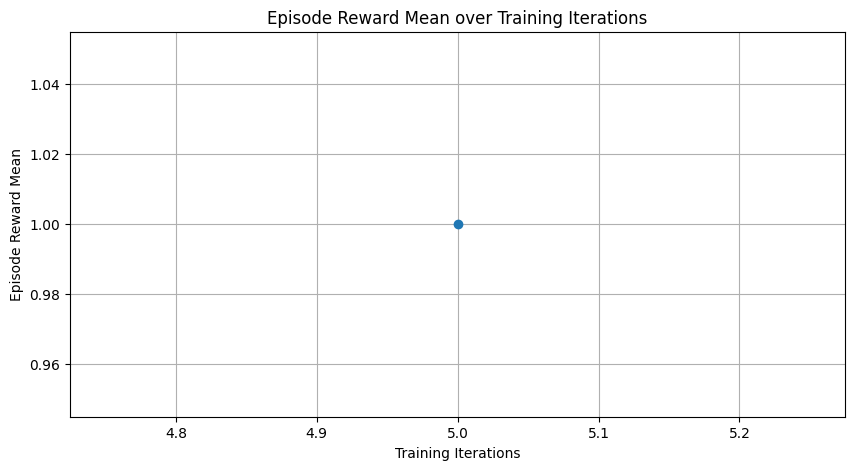

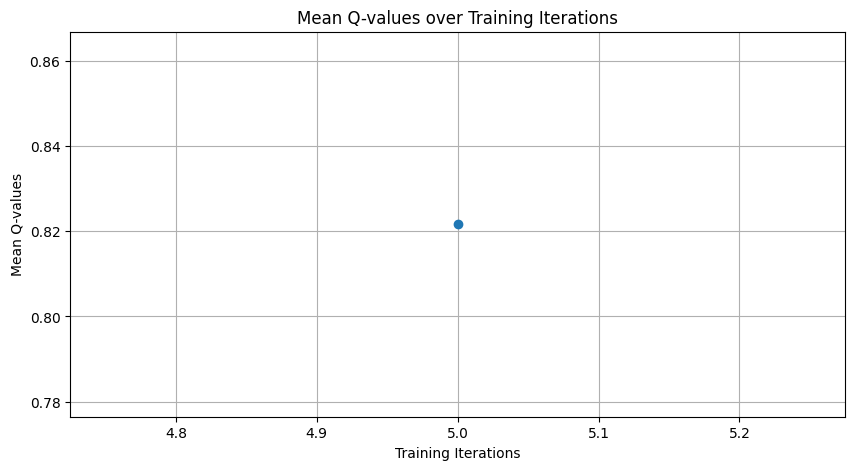

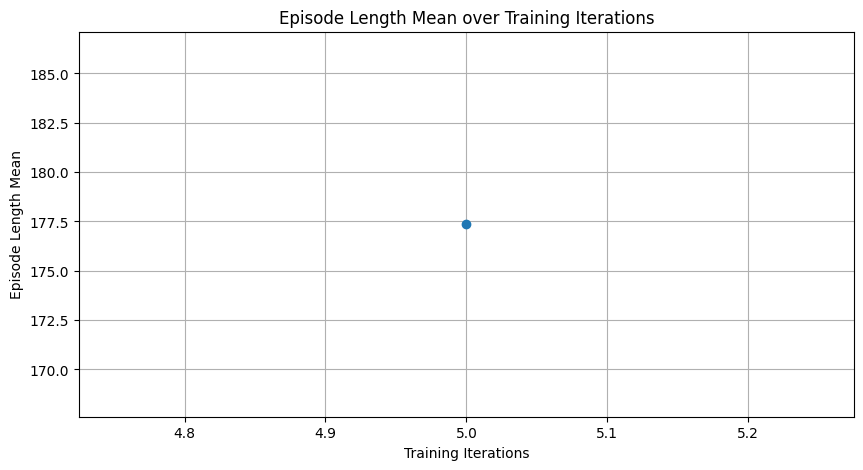

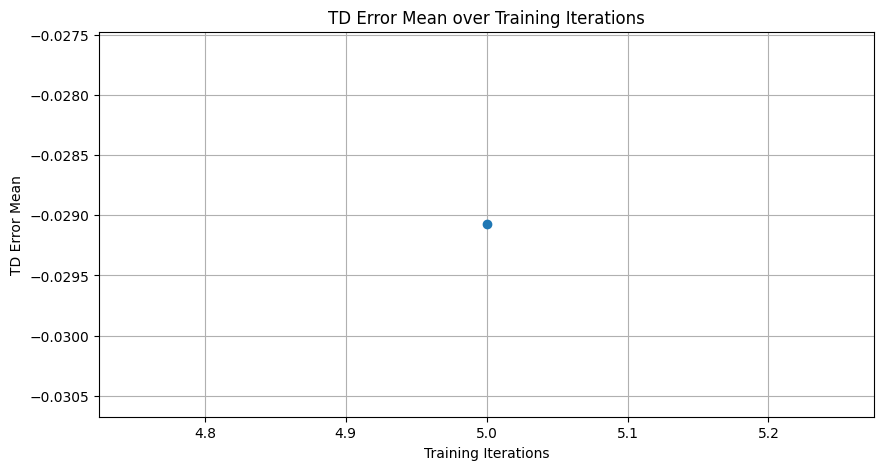

In [ ]:
import matplotlib.pyplot as plt

# Extract relevant data
iterations = []
episode_reward_mean = []
mean_q_values = []
episode_length_mean = []
td_error_mean = []

for trial_id, trial_data in analysis.results.items():
    iterations.append(trial_data['training_iteration'])
    episode_reward_mean.append(trial_data['episode_reward_mean'])
    mean_q_values.append(trial_data['info']['learner']['default_policy']['learner_stats']['mean_q'])
    episode_length_mean.append(trial_data['episode_len_mean'])
    td_error_mean.append(trial_data['info']['learner']['default_policy']['mean_td_error'])

# Plot Episode Reward Mean
plt.figure(figsize=(10, 5))
plt.plot(iterations, episode_reward_mean, marker='o')
plt.xlabel('Training Iterations')
plt.ylabel('Episode Reward Mean')
plt.title('Episode Reward Mean over Training Iterations')
plt.grid(True)
plt.show()

# Plot Mean Q-values
plt.figure(figsize=(10, 5))
plt.plot(iterations, mean_q_values, marker='o')
plt.xlabel('Training Iterations')
plt.ylabel('Mean Q-values')
plt.title('Mean Q-values over Training Iterations')
plt.grid(True)
plt.show()

# Plot Episode Length Mean
plt.figure(figsize=(10, 5))
plt.plot(iterations, episode_length_mean, marker='o')
plt.xlabel('Training Iterations')
plt.ylabel('Episode Length Mean')
plt.title('Episode Length Mean over Training Iterations')
plt.grid(True)
plt.show()

# Plot TD Error Mean
plt.figure(figsize=(10, 5))
plt.plot(iterations, td_error_mean, marker='o')
plt.xlabel('Training Iterations')
plt.ylabel('TD Error Mean')
plt.title('TD Error Mean over Training Iterations')
plt.grid(True)
plt.show()


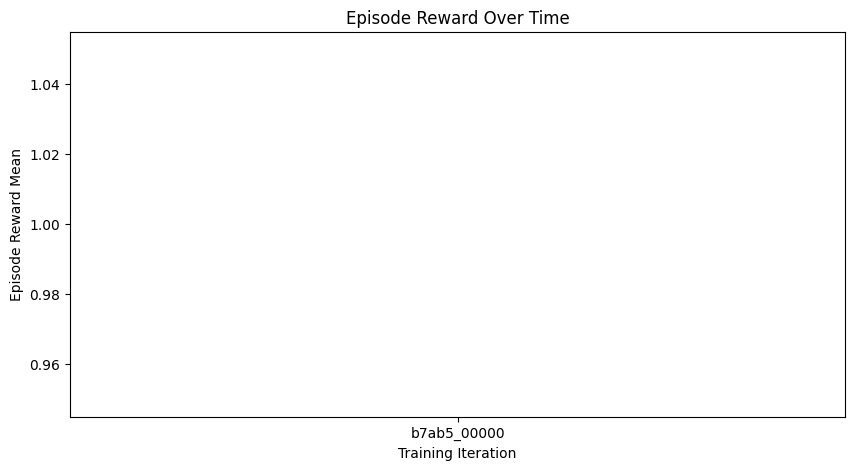

In [ ]:
import matplotlib.pyplot as plt

# Get the dataframe from the analysis object
df = analysis.results_df

# Plot the episode reward mean over time
plt.figure(figsize=(10,5))
plt.plot(df['episode_reward_mean'])
plt.title('Episode Reward Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Episode Reward Mean')
plt.show()


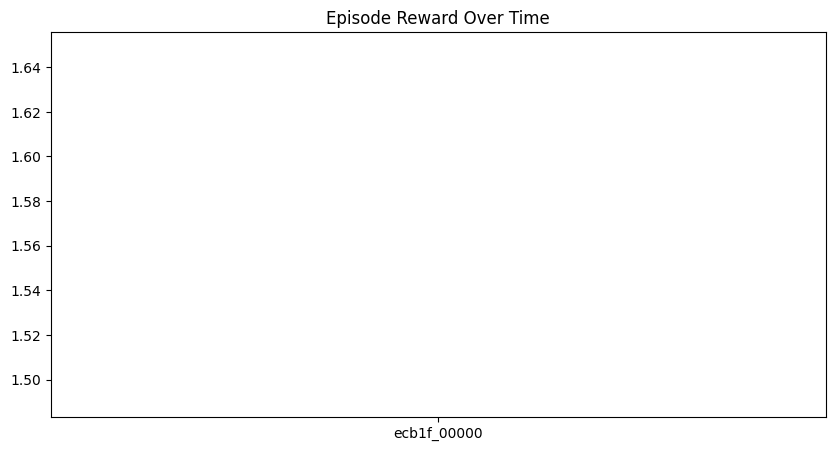

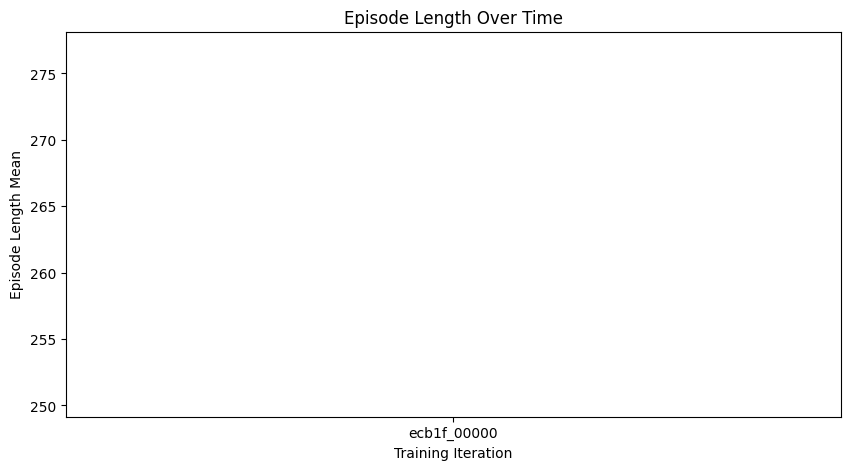

KeyError: 'info/learner/default_policy/loss'

<Figure size 1000x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Get the dataframe from the analysis object
df = analysis.results_df

# Plot the episode reward mean over time
plt.figure(figsize=(10,5))
plt.plot(df['episode_reward_mean'])
plt.title('Episode Reward Over Time')
# Plot the episode length over time
plt.figure(figsize=(10,5))
plt.plot(df['episode_len_mean'])
plt.title('Episode Length Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Episode Length Mean')
plt.show()

# Plot the loss over time
plt.figure(figsize=(10,5))
plt.plot(df['info/learner/default_policy/loss'])
plt.title('Loss Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.show()

# Plot the exploration rate over time
plt.figure(figsize=(10,5))
plt.plot(df['info/learner/default_policy/cur_lr'])
plt.title('Exploration Rate Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Exploration Rate')
plt.show()


In [ ]:
import os

# List files in the ray_results directory
ray_results_dir = "/root/ray_results"
experiment_dirs = os.listdir(ray_results_dir)
print("Experiment directories in /root/ray_results:")
print(experiment_dirs)

# Choose an experiment directory
# Replace "Breakout_Model" with your experiment name
experiment_name = "Breakout_Model"
experiment_dir = os.path.join(ray_results_dir, experiment_name)

# List files in the chosen experiment directory
print(f"\nFiles in experiment directory {experiment_dir}:")
experiment_files = os.listdir(experiment_dir)
print(experiment_files)


Experiment directories in /root/ray_results:
['Model', 'Breakout_Model']

Files in experiment directory /root/ray_results/Breakout_Model:
['DQN_bfc63_00000_0_2024-05-10_15-19-52', 'experiment_state-2024-05-10_15-19-03.json', 'experiment_state-2024-05-10_15-16-00.json', 'basic-variant-state-2024-05-10_15-42-05.json', 'experiment_state-2024-05-10_15-13-46.json', 'basic-variant-state-2024-05-10_15-42-36.json', 'basic-variant-state-2024-05-10_15-32-22.json', 'DQN_BreakoutDeterministic-v4_e590e_00000_0_2024-05-10_15-13-46', 'experiment_state-2024-05-10_15-42-05.json', 'basic-variant-state-2024-05-10_15-19-52.json', 'basic-variant-state-2024-05-10_15-19-03.json', 'basic-variant-state-2024-05-10_15-13-46.json', 'DQN_BreakoutDeterministic-v4_ecb1f_00000_0_2024-05-10_15-42-36', 'DQN_a24e0_00000_0_2024-05-10_15-19-03', 'experiment_state-2024-05-10_15-32-22.json', '.validate_storage_marker', 'experiment_state-2024-05-10_15-42-36.json', 'DQN_BreakoutDeterministic-v4_35951_00000_0_2024-05-10_15-16-

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ray import tune

# Load the analysis data
analysis = tune.Analysis("/root/ray_results/Breakout_Model")  # Replace with your log directory

# Reward Plot
plt.figure(figsize=(10, 5))
plt.plot(analysis.dataframe()["episode_reward_mean"], label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward Plot")
plt.legend()
plt.show()

# Average Reward Plot
plt.figure(figsize=(10, 5))
rolling_mean = analysis.dataframe()["episode_reward_mean"].rolling(window=50).mean()
plt.plot(rolling_mean, label="Average Reward (Rolling Mean)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward Plot (Rolling Mean)")
plt.legend()
plt.show()

# Training Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(analysis.dataframe()["info/loss"], label="Training Loss")
plt.xlabel("Time Step")
plt.ylabel("Loss")
plt.title("Training Loss Plot")
plt.legend()
plt.show()

# Exploration vs. Exploitation Plot
plt.figure(figsize=(10, 5))
plt.plot(analysis.dataframe()["exploration_value"], label="Exploration Value")
plt.xlabel("Episode")
plt.ylabel("Exploration Value")
plt.title("Exploration vs. Exploitation Plot")
plt.legend()
plt.show()

# Episode Length Plot
plt.figure(figsize=(10, 5))
plt.plot(analysis.dataframe()["episode_len_mean"], label="Episode Length")
plt.xlabel("Episode")
plt.ylabel("Length")
plt.title("Episode Length Plot")
plt.legend()
plt.show()

# Target Network Update Frequency Plot
plt.figure(figsize=(10, 5))
plt.plot(analysis.dataframe()["info/target_updates"], label="Target Network Update Frequency")
plt.xlabel("Time Step")
plt.ylabel("Frequency")
plt.title("Target Network Update Frequency Plot")
plt.legend()
plt.show()

# GPU Utilization Plot (assuming GPU is used)
if "gpu_util_percent" in analysis.dataframe().columns:
    plt.figure(figsize=(10, 5))
    plt.plot(analysis.dataframe()["gpu_util_percent"], label="GPU Utilization")
    plt.xlabel("Time Step")
    plt.ylabel("Utilization (%)")
    plt.title("GPU Utilization Plot")
    plt.legend()
    plt.show()
else:
    print("GPU utilization data not available.")

# Checkpoint Evaluation Metrics (example: average episode reward)
checkpoint_metrics = analysis.fetch_trial_dataframes(metric="episode_reward_mean")
for i, (checkpoint, metrics) in enumerate(checkpoint_metrics.items()):
    plt.figure(figsize=(10, 5))
    plt.plot(metrics["episode_reward_mean"], label=f"Checkpoint {i+1}")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.title(f"Checkpoint {i+1} Evaluation Metrics")
    plt.legend()
    plt.show()


AttributeError: module 'ray.tune' has no attribute 'Analysis'

In [ ]:
import ray
from ray import tune
from ray.rllib.algorithms import PPO

# Initialize Ray
ray.init(ignore_reinit_error=True)

# Define the environment configuration
config = {
    "env": "AirRaid-v0",  # Atari Environment
    "num_gpus": 1,
    "num_workers": 1,
    "lr": 0.0001,
    "gamma": 0.99,
    "train_batch_size": 5000,
    "model": {
        "dim": 84,
        "conv_filters": [[32, 8, 4], [64, 4, 2], [64, 3, 1]],
        "conv_activation": "relu",
        "fcnet_hiddens": [256, 256]
    },
    "preprocessor_pref": "deepmind",
    "lambda": 0.95,
    "clip_param": 0.1,
    "num_sgd_iter": 10,
    "sgd_minibatch_size": 500,
    "horizon": 4000,
    "soft_horizon": False,
    "no_done_at_end": True,
    "normalize_actions": False,
    "clip_rewards": True,
    "clip_rewards_v_min": -10.0,
    "clip_rewards_v_max": 10.0,
}

# Train the agent
analysis = tune.run(PPO, config=config, stop={"training_iteration": 10})

# Get the path to the best trained model
best_checkpoint = analysis.get_best_checkpoint(metric="episode_reward_mean", mode="max")

# Create a new agent and load the trained weights
agent = PPO(config=config)
agent.restore(best_checkpoint)

# Now you can use the trained agent to make predictions


2024-05-09 19:30:22,676	INFO worker.py:1582 -- Calling ray.init() again after it has already been called.


+------------------------------------------------------------+
| Configuration for experiment     PPO_2024-05-09_19-30-22   |
+------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator     |
| Scheduler                        FIFOScheduler             |
| Number of trials                 1                         |
+------------------------------------------------------------+

View detailed results here: /root/ray_results/PPO_2024-05-09_19-30-22
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-09_19-28-31_884241_915/artifacts/2024-05-09_19-30-22/PPO_2024-05-09_19-30-22/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-09 19:30:22. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------+
| Trial name                   status   |
+---------------------------------------+
| PPO_AirRaid-v

(PPO pid=3596) 2024-05-09 19:30:31,362	WARNING deprecation.py:50 -- DeprecationWarning: `WorkerSet(num_workers=... OR local_worker=...)` has been deprecated. Use `EnvRunnerGroup(num_env_runners=... AND local_env_runner=...)` instead. This will raise an error in the future!
(PPO pid=3596) 2024-05-09 19:30:31,362	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
2024-05-09 19:30:37,673	ERROR tune_controller.py:1331 -- Trial task failed for trial PPO_AirRaid-v0_94143_00000
ray.rllib.utils.error.EnvError: The env string you provided ('AirRaid-v0') is:
a) Not a supported/installed environment.
b) Not a tune-registered environment creator.
c) Not a valid env class string.

Try one of the following:
a) For Atari support: `pip install gym[atari] autorom[accept-rom-license]`.
   For PyBullet support: `pip install pybullet`.
b) To register your custom e


Trial PPO_AirRaid-v0_94143_00000 errored after 0 iterations at 2024-05-09 19:30:37. Total running time: 14s
Error file: /tmp/ray/session_2024-05-09_19-28-31_884241_915/artifacts/2024-05-09_19-30-22/PPO_2024-05-09_19-30-22/driver_artifacts/PPO_AirRaid-v0_94143_00000_0_2024-05-09_19-30-22/error.txt

Trial status: 1 ERROR
Current time: 2024-05-09 19:30:37. Total running time: 14s
Logical resource usage: 0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------+
| Trial name                   status   |
+---------------------------------------+
| PPO_AirRaid-v0_94143_00000   ERROR    |
+---------------------------------------+

Number of errored trials: 1
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                     # failures   error file                         

TuneError: ('Trials did not complete', [PPO_AirRaid-v0_94143_00000])

(PPO pid=3596) 2024-05-09 19:30:37,657	ERROR actor_manager.py:519 -- Ray error, taking actor 1 out of service. The actor died because of an error raised in its creation task, ray::RolloutWorker.__init__() (pid=3660, ip=172.28.0.12, actor_id=8fd0aed44e73d33c12b8864a01000000, repr=<ray.rllib.evaluation.rollout_worker.RolloutWorker object at 0x7da3a50f4190>)
(PPO pid=3596)   File "/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py", line 740, in make
(PPO pid=3596)     env_spec = _find_spec(id)
(PPO pid=3596)   File "/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py", line 537, in _find_spec
(PPO pid=3596)     _check_version_exists(ns, name, version)
(PPO pid=3596)   File "/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py", line 403, in _check_version_exists
(PPO pid=3596)     _check_name_exists(ns, name)
(PPO pid=3596)   File "/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py", line 380, in _check_name_exi

In [ ]:
!tensorboard --logdir

usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}] [--grpc_data_provider PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import] [--inspect]
                   [--version_tb] [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS] [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN] [--detect_file_replacement BOOL]
                   {serve,dev} ...
tensorboard: error: argument --logdir: expected one argument


In [ ]:
from utils import parse_arguments, read_settings, plot_rewards, simulate_notebook
import matplotlib.pyplot as plt
import gymnasium as gym
import torch
from tqdm import tqdm
from agent import DQNAgent, DoubleDQNAgent
import os

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available(
) else 'mps' if torch.backends.mps.is_available() else 'cpu')

In [ ]:
def train_dqn(env: gym.Env, agent: DQNAgent, episodes: int):
    episode_rewards = []
    for episode in tqdm(range(episodes), desc="Training: "):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = agent.act(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, next_state, reward, done)
            state = next_state
            total_reward += reward
            agent.replay()

        # print("Episode: {}/{}, Total Reward: {}, Epsilon: {:.2}".format(
        #     episode+1, episodes, total_reward, agent.epsilon))
        episode_rewards.append(total_reward)
    return episode_rewards